In [1]:
input_file = "opencc-1.0.1-win64/zhwiki_jian_zh.txt"

In [2]:
import os
os.path.exists(input_file)

True

In [3]:
import re
def clean_html(raw_html):
    cleanr = re.compile('<.*>')
    cleantext = re.sub(cleanr, ' ', raw_html)
    return cleantext

In [4]:
clean_html('<doc id="13" url="https://zh.wikipedia.org/wiki?curid=13" title="数学">学科')

' 学科'

In [5]:
import re
TEXT = ""

for line in open(input_file,'r', encoding='utf8'):
    line = line.strip()
    line = clean_html(line)
    TEXT += ' '.join(re.findall('[\w|\d]+', line))

In [7]:
TEXT[:10]

'数学数学是利用符号语'

In [8]:
import jieba
def cut(string): return list(jieba.cut(string))

In [9]:
cut('这是一个测试')

Building prefix dict from the default dictionary ...
Loading model from cache D:\Users\teacher01\AppData\Local\Temp\jieba.cache
Loading model cost 1.079 seconds.
Prefix dict has been built succesfully.


['这是', '一个', '测试']

In [10]:
all_tokens = cut(TEXT)

In [16]:
all_tokens[:50]

['数学',
 '数学',
 '是',
 '利用',
 '符号语言',
 '研究',
 '数量',
 ' ',
 '结构',
 ' ',
 '变化',
 '以及',
 '空间',
 '等',
 '概念',
 '的',
 '一门',
 '学科',
 ' ',
 '从',
 '某种',
 '角度看',
 '属于',
 '形式',
 '科学',
 '的',
 '一种',
 ' ',
 '数学',
 '透过',
 '抽象化',
 '和',
 '逻辑推理',
 '的',
 '使用',
 ' ',
 '由',
 '计数',
 ' ',
 '计算',
 ' ',
 '量度',
 '和',
 '对',
 '物体',
 '形状',
 '及',
 '运动',
 '的',
 '观察']

In [13]:
len(all_tokens)

34209749

In [14]:
valid_tokens = [t for t in all_tokens if t.strip()]

In [18]:
valid_tokens[:50]

['数学',
 '数学',
 '是',
 '利用',
 '符号语言',
 '研究',
 '数量',
 '结构',
 '变化',
 '以及',
 '空间',
 '等',
 '概念',
 '的',
 '一门',
 '学科',
 '从',
 '某种',
 '角度看',
 '属于',
 '形式',
 '科学',
 '的',
 '一种',
 '数学',
 '透过',
 '抽象化',
 '和',
 '逻辑推理',
 '的',
 '使用',
 '由',
 '计数',
 '计算',
 '量度',
 '和',
 '对',
 '物体',
 '形状',
 '及',
 '运动',
 '的',
 '观察',
 '而',
 '产生',
 '数学家',
 '们',
 '拓展',
 '这些',
 '概念']

In [20]:
len(valid_tokens)

28802783

In [21]:
from collections import Counter

In [22]:
words_count = Counter(valid_tokens)

In [23]:
words_count.most_common(10)

[('的', 1645232),
 ('在', 434328),
 ('年', 360199),
 ('是', 307147),
 ('和', 256389),
 ('了', 213828),
 ('为', 197526),
 ('与', 153858),
 ('月', 152500),
 ('有', 145112)]

In [24]:
frequences = [f for w, f in words_count.most_common(100)]

In [26]:
len(frequences)

100

In [27]:
x = [i for i in range(len(frequences))]

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

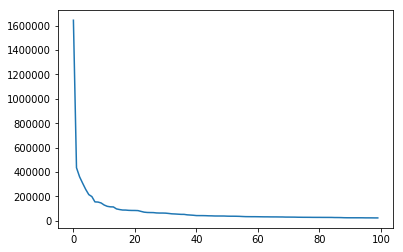

In [29]:
plt.plot(x, frequences)

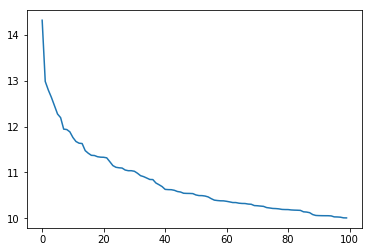

In [30]:
import numpy as np
plt.plot(x,np.log(frequences))

In [33]:
frequences_all = [f for w,f in words_count.most_common()]

In [34]:
frequences_sum = sum(frequences_all)

In [35]:
frequences_sum

28802783

In [36]:
1 / frequences_sum

3.471886727056896e-08

1-gram

In [41]:
def get_prob(word):
    esp = 1 / frequences_sum
    if word in words_count:
        return words_count[word]/frequences_sum
    else:
        return esp

In [45]:
from functools import reduce
def product(numbers):
    return reduce(lambda n1, n2: n1*n2, numbers)

In [46]:
def language_model_one_gram(string):      
    words = cut(string)
    return product([get_prob(w) for w in words])

In [47]:
language_model_one_gram('数学是一门有趣的学科')

4.21967212379829e-21

In [48]:
language_model_one_gram('广交会下个月举办')

1.5201635314575155e-17

In [49]:
language_model_one_gram('长征火箭下周发射')

2.112249265512451e-20

In [50]:
sentences = """
这是一个比较正常的句子
这个一个比较罕见的句子
小明毕业于清华大学
小明毕业于秦华大学
""".split()

In [52]:
for s in sentences:
    print(s,language_model_one_gram(s))

这是一个比较正常的句子 7.121920185873404e-21
这个一个比较罕见的句子 1.1133100611027428e-20
小明毕业于清华大学 4.88861566214038e-18
小明毕业于秦华大学 3.71639262781198e-24


In [54]:
need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "我去吃火锅，今晚 今晚我去吃火锅"
]
for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = language_model_one_gram(s1), language_model_one_gram(s2)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

明天晚上请你吃大餐，我们一起吃苹果 is more possible
---- 今天晚上请你吃大餐，我们一起吃日料 with probility 9.768048178425337e-54
---- 明天晚上请你吃大餐，我们一起吃苹果 with probility 8.597674699432354e-52
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probility 5.0850365887440446e-26
---- 真是一只好看的小猫 with probility 3.760354676209208e-23
今晚我去吃火锅 is more possible
---- 我去吃火锅，今晚 with probility 4.375988333460607e-28
---- 今晚我去吃火锅 with probility 1.260406423791975e-20


2-gram

In [55]:
valid_tokens[:10]

['数学', '数学', '是', '利用', '符号语言', '研究', '数量', '结构', '变化', '以及']

In [56]:
all_2_grams_words = [''.join(valid_tokens[i:i+2]) for i in range(len(valid_tokens[:-2]))]

In [57]:
all_2_grams_words[:10]

['数学数学',
 '数学是',
 '是利用',
 '利用符号语言',
 '符号语言研究',
 '研究数量',
 '数量结构',
 '结构变化',
 '变化以及',
 '以及空间']

In [59]:
_2_gram_sum = len(all_2_grams_words)

In [60]:
_2_gram_sum

28802781

In [61]:
_2_gram_counter = Counter(all_2_grams_words)

In [64]:
_2_gram_counter['数学学科']

18

In [65]:
def get_combination_prob(w1, w2):  
    if w1 + w2 in _2_gram_counter: return _2_gram_counter[w1+w2] / _2_gram_sum    
    else:
        return 1 / _2_gram_sum

In [66]:
def get_prob_2_gram(w1, w2):
    return get_combination_prob(w1, w2) / get_prob(w1)

In [67]:
def langauge_model_of_2_gram(sentence):
    sentence_probability = 1
    
    words = cut(sentence)
    
    for i, word in enumerate(words):
        if i == 0: 
            prob = get_prob(word)
        else:
            previous = words[i-1]
            prob = get_prob_2_gram(previous, word)
        sentence_probability *= prob
    
    return sentence_probability

In [80]:
langauge_model_of_2_gram('小明今天抽奖抽到一台苹果手机')

7.137427485646123e-20

In [82]:
langauge_model_of_2_gram('小明今天抽奖抽到一架波音飞机')

1.2670294642342086e-17

In [70]:
langauge_model_of_2_gram('数学是一门有趣的学科')

1.5338394311395498e-16

In [71]:
need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "今晚我去吃火锅 今晚火锅去吃我",
    "洋葱奶昔来一杯 养乐多绿来一杯"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = langauge_model_of_2_gram(s1), langauge_model_of_2_gram(s2)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

今天晚上请你吃大餐，我们一起吃日料 is more possible
---- 今天晚上请你吃大餐，我们一起吃日料 with probility 2.484268917566916e-28
---- 明天晚上请你吃大餐，我们一起吃苹果 with probility 4.9685378351338324e-29
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probility 1.5689579891184576e-20
---- 真是一只好看的小猫 with probility 5.607455463740337e-17
今晚我去吃火锅 is more possible
---- 今晚我去吃火锅 with probility 2.1900967917224162e-14
---- 今晚火锅去吃我 with probility 1.1074197926677595e-15
养乐多绿来一杯 is more possible
---- 洋葱奶昔来一杯 with probility 2.4879164817605473e-12
---- 养乐多绿来一杯 with probility 3.471887209216844e-08


# If we need to solve following problems, how can language model help us?

Voice Recognization.

语音识别中语言模型的目的就是根据声学模型输出的结果，给出概率最大的文字序列！

Sogou pinyin input.
联想输入，打出一串拼音，直接给出了合适的句子，即使不是你想要的，但确实是符合语法习惯的
Auto correction in search engine.
搜索时，自动纠错，并匹配概率较高的关键词

Abnormal Detection.
对用户输入的内容进行概率判断，若是概率过小则进入异常处理的模块中进行相应处理。


# Compared to the previous learned parsing and pattern match problems. What's the advantage and disavantage of Probability Based Methods? 

Ans:  基于概率的模型简单直观易理解，解决了基于模式匹配方法不能解决的复杂问题。

优点：通用性较强，可以解决大部分问题，而且准确率并不算低。

缺点：过于依赖语料库，若是语料库中语料不平衡，会导致模型失准严重。同时，在解决长句时的计算量增加过大，模型设计难度变大，且长句的判断概率逐渐向0收敛，最终导致无法准确的进行判断。